In [1]:
import numpy as np
from hmc_u1 import HMC_U1
from field_transformations import manual_field_transformation
from nn_model import NNFieldTransformation
from utils import plot_results

In [2]:
# Parameters
""" 
total_time = n_steps * step_size should be around 1 to 2 units.
If the energy conservation is not good, try to reduce the step size.
"""

lattice_size = 16
beta = 1.0
n_steps = 20
step_size = 0.002
n_iterations = 1000

hmc = HMC_U1(lattice_size, beta, n_steps, step_size)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1227.98it/s]


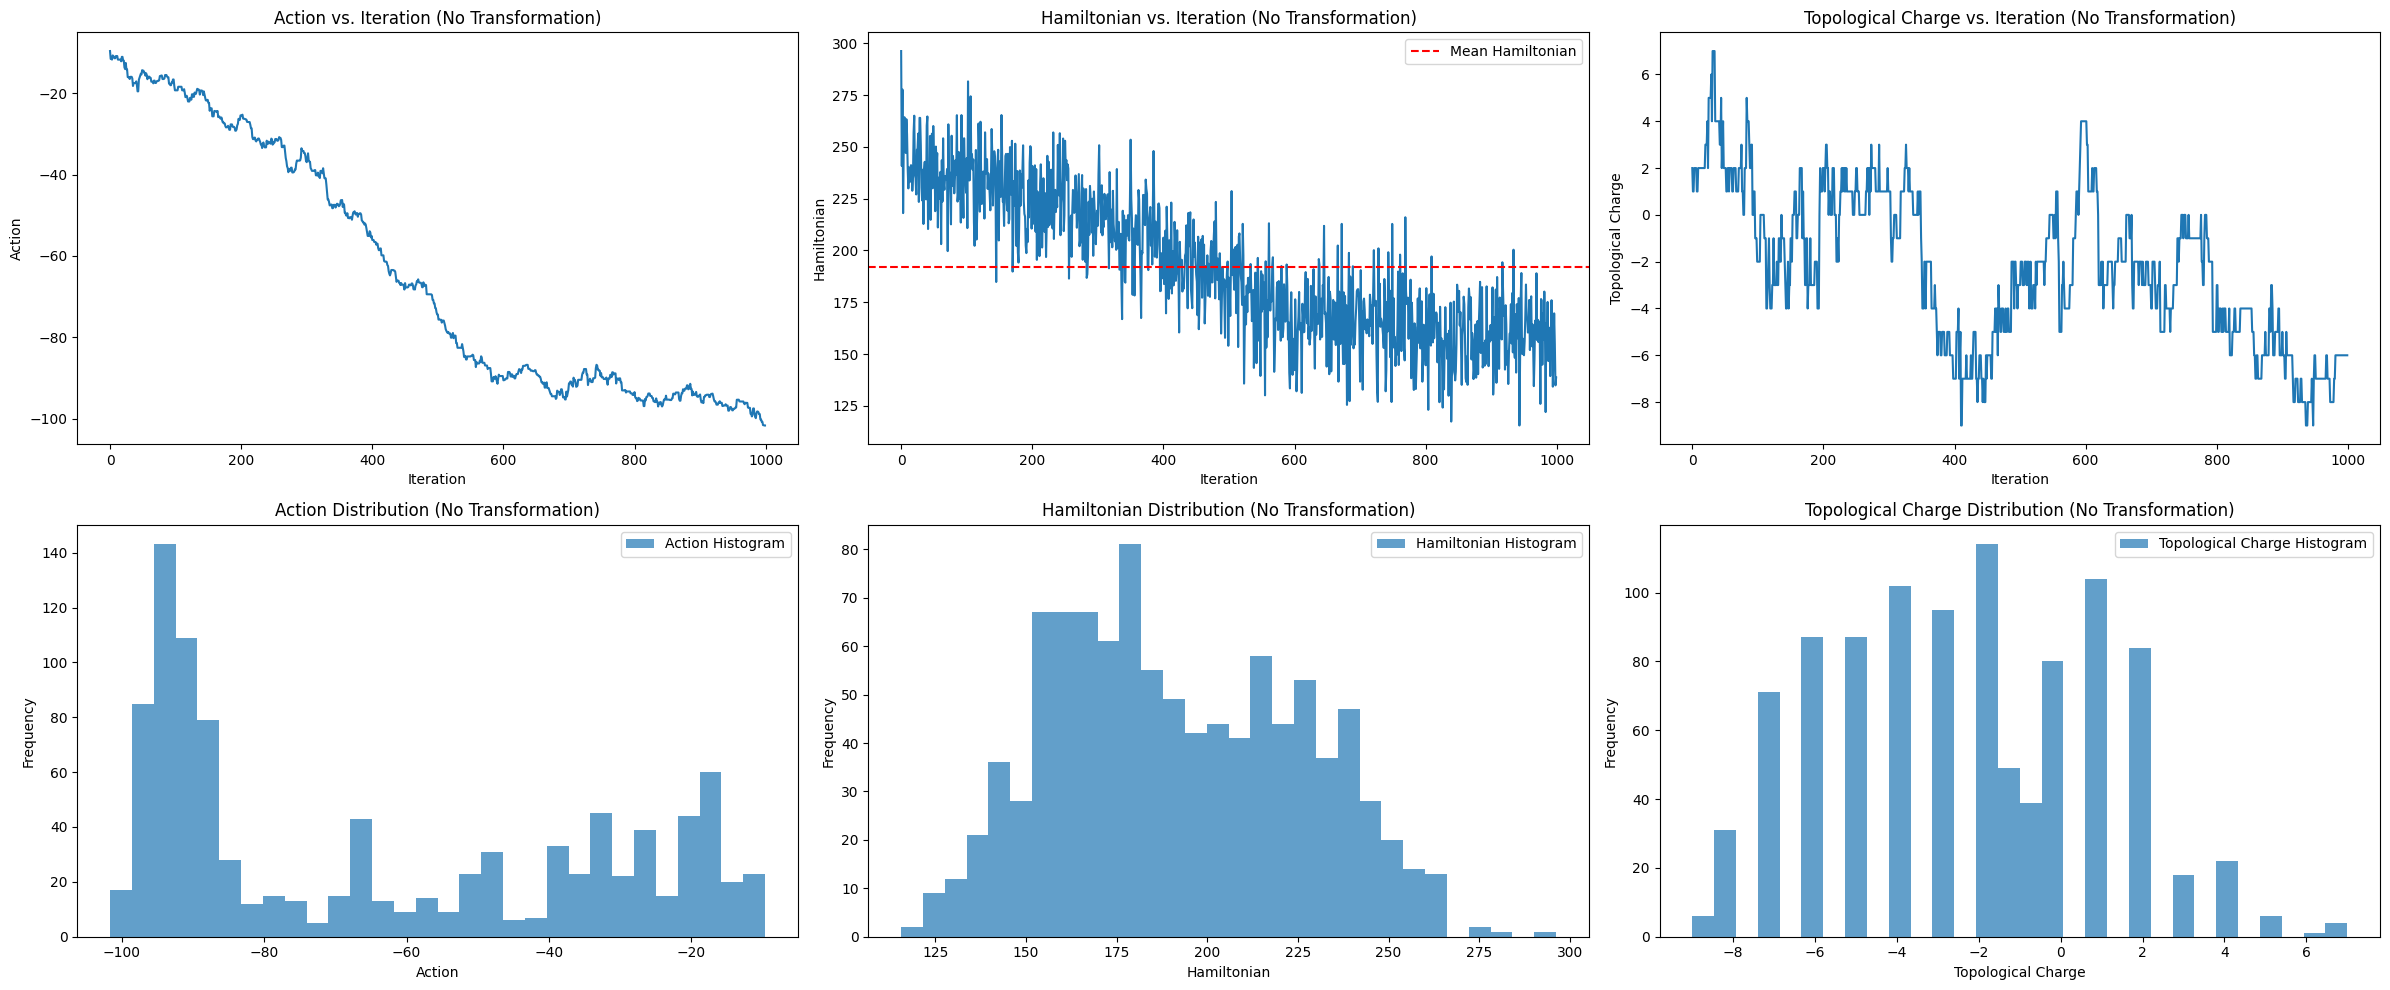

>>> No Field Transformation
Acceptance rate: 0.6070
Relative variation of Hamiltonian (delta H / H_mean): 0.9412
Variation of topological charge (delta Q): 16.0000


In [3]:
# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations)
plot_results(actions, topological_charges, hamiltonians, title_suffix="(No Transformation)")

print(">>> No Field Transformation")

# Print the acceptance rate
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

100%|██████████| 1000/1000 [00:00<00:00, 1202.02it/s]


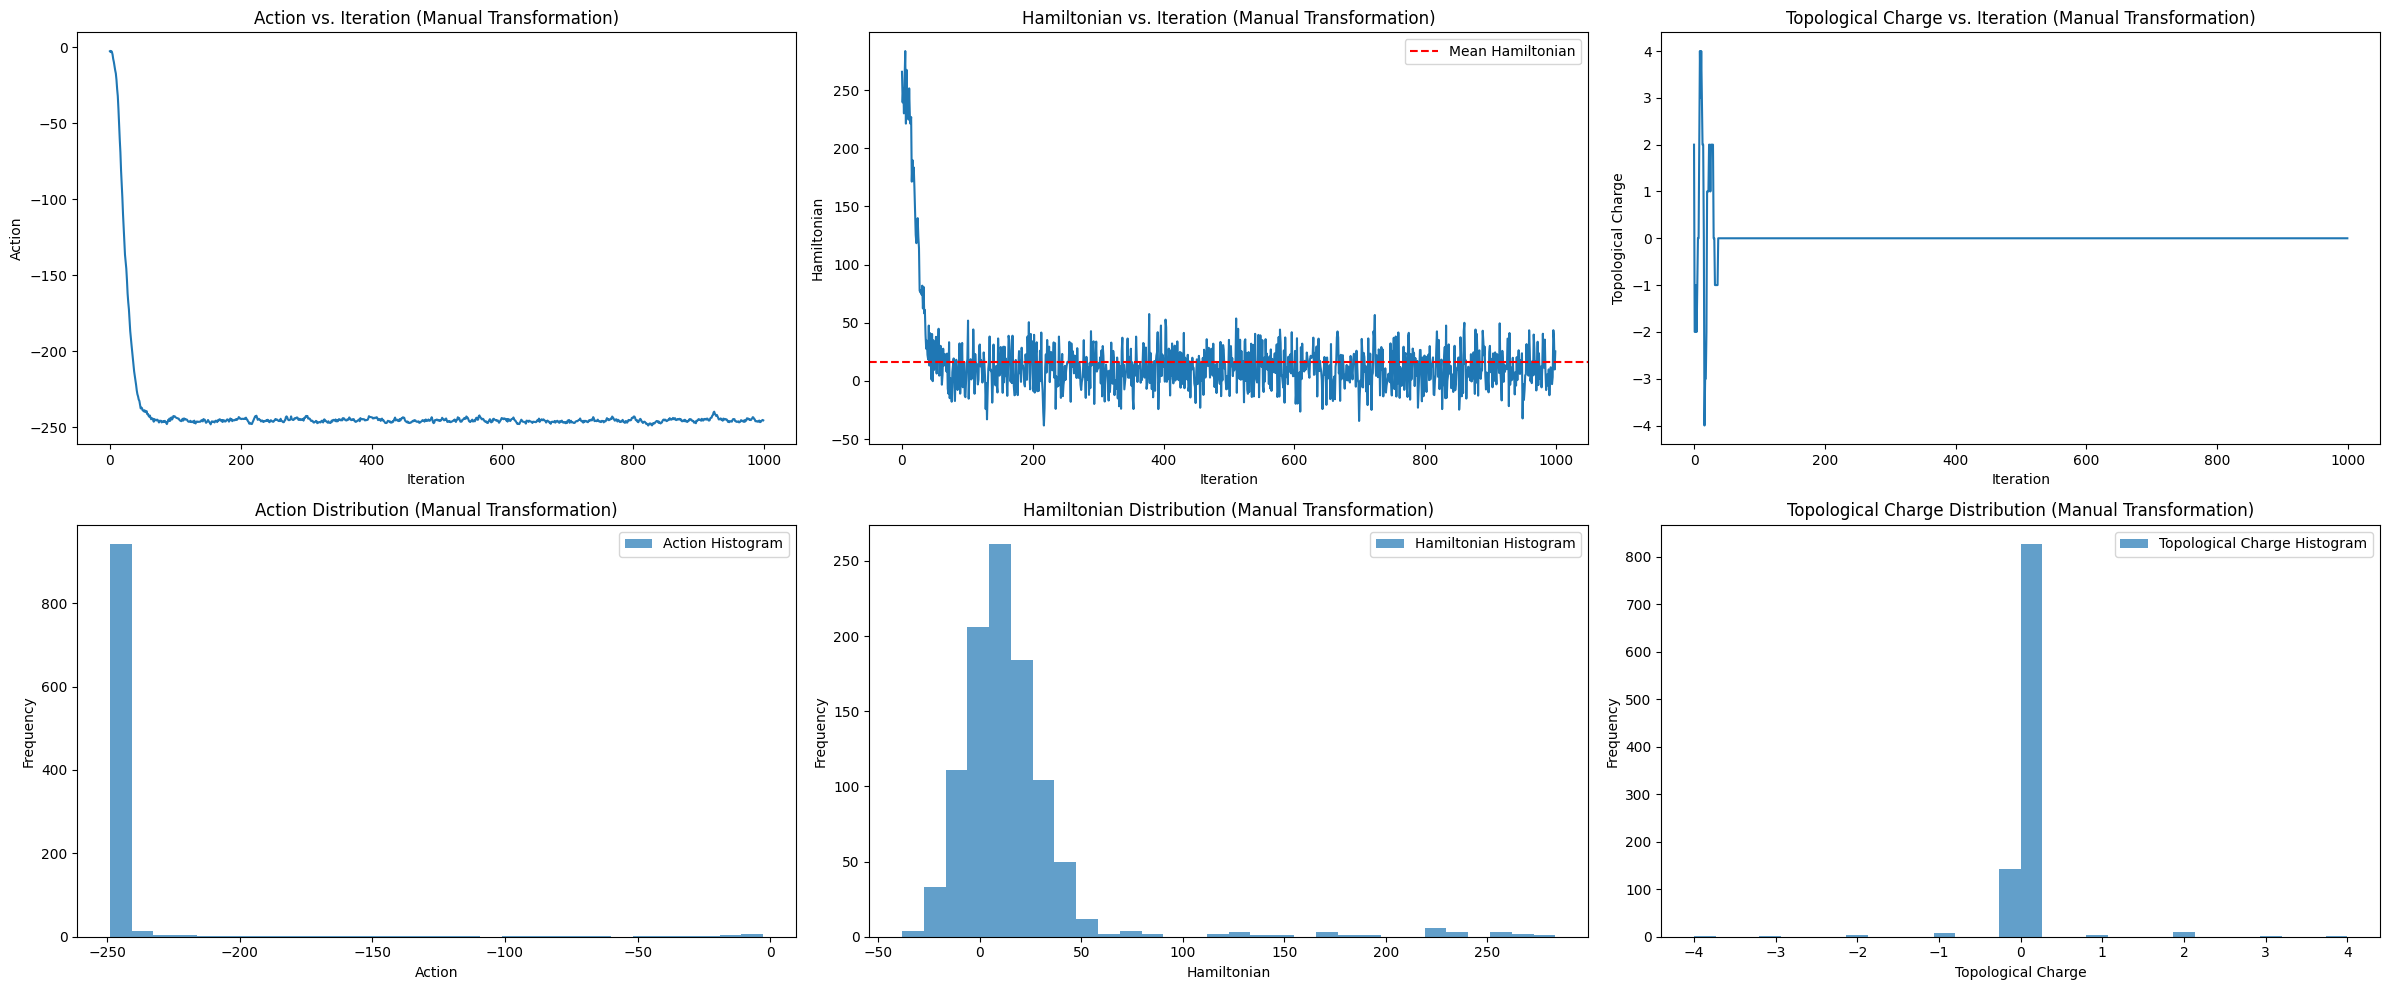

>>> Manual Field Transformation
Acceptance rate: 0.4720
Relative variation of Hamiltonian (delta H / H_mean): 19.9285
Variation of topological charge (delta Q): 8.0000


In [4]:
# Run HMC with manual field transformation
final_config_manual, actions_manual, acceptance_rate_manual, topological_charges_manual, hamiltonians_manual = hmc.run(n_iterations, field_transformation=manual_field_transformation)
plot_results(actions_manual, topological_charges_manual, hamiltonians_manual, title_suffix="(Manual Transformation)")

print(">>> Manual Field Transformation")

# Print the acceptance rate
print(f"Acceptance rate: {acceptance_rate_manual:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H_manual = np.max(hamiltonians_manual) - np.min(hamiltonians_manual)
H_mean_manual = np.mean(hamiltonians_manual)
relative_delta_H_manual = delta_H_manual / H_mean_manual
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H_manual:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q_manual = np.max(topological_charges_manual) - np.min(topological_charges_manual)
print(f"Variation of topological charge (delta Q): {delta_Q_manual:.4f}")

100%|██████████| 1000/1000 [00:01<00:00, 937.46it/s]


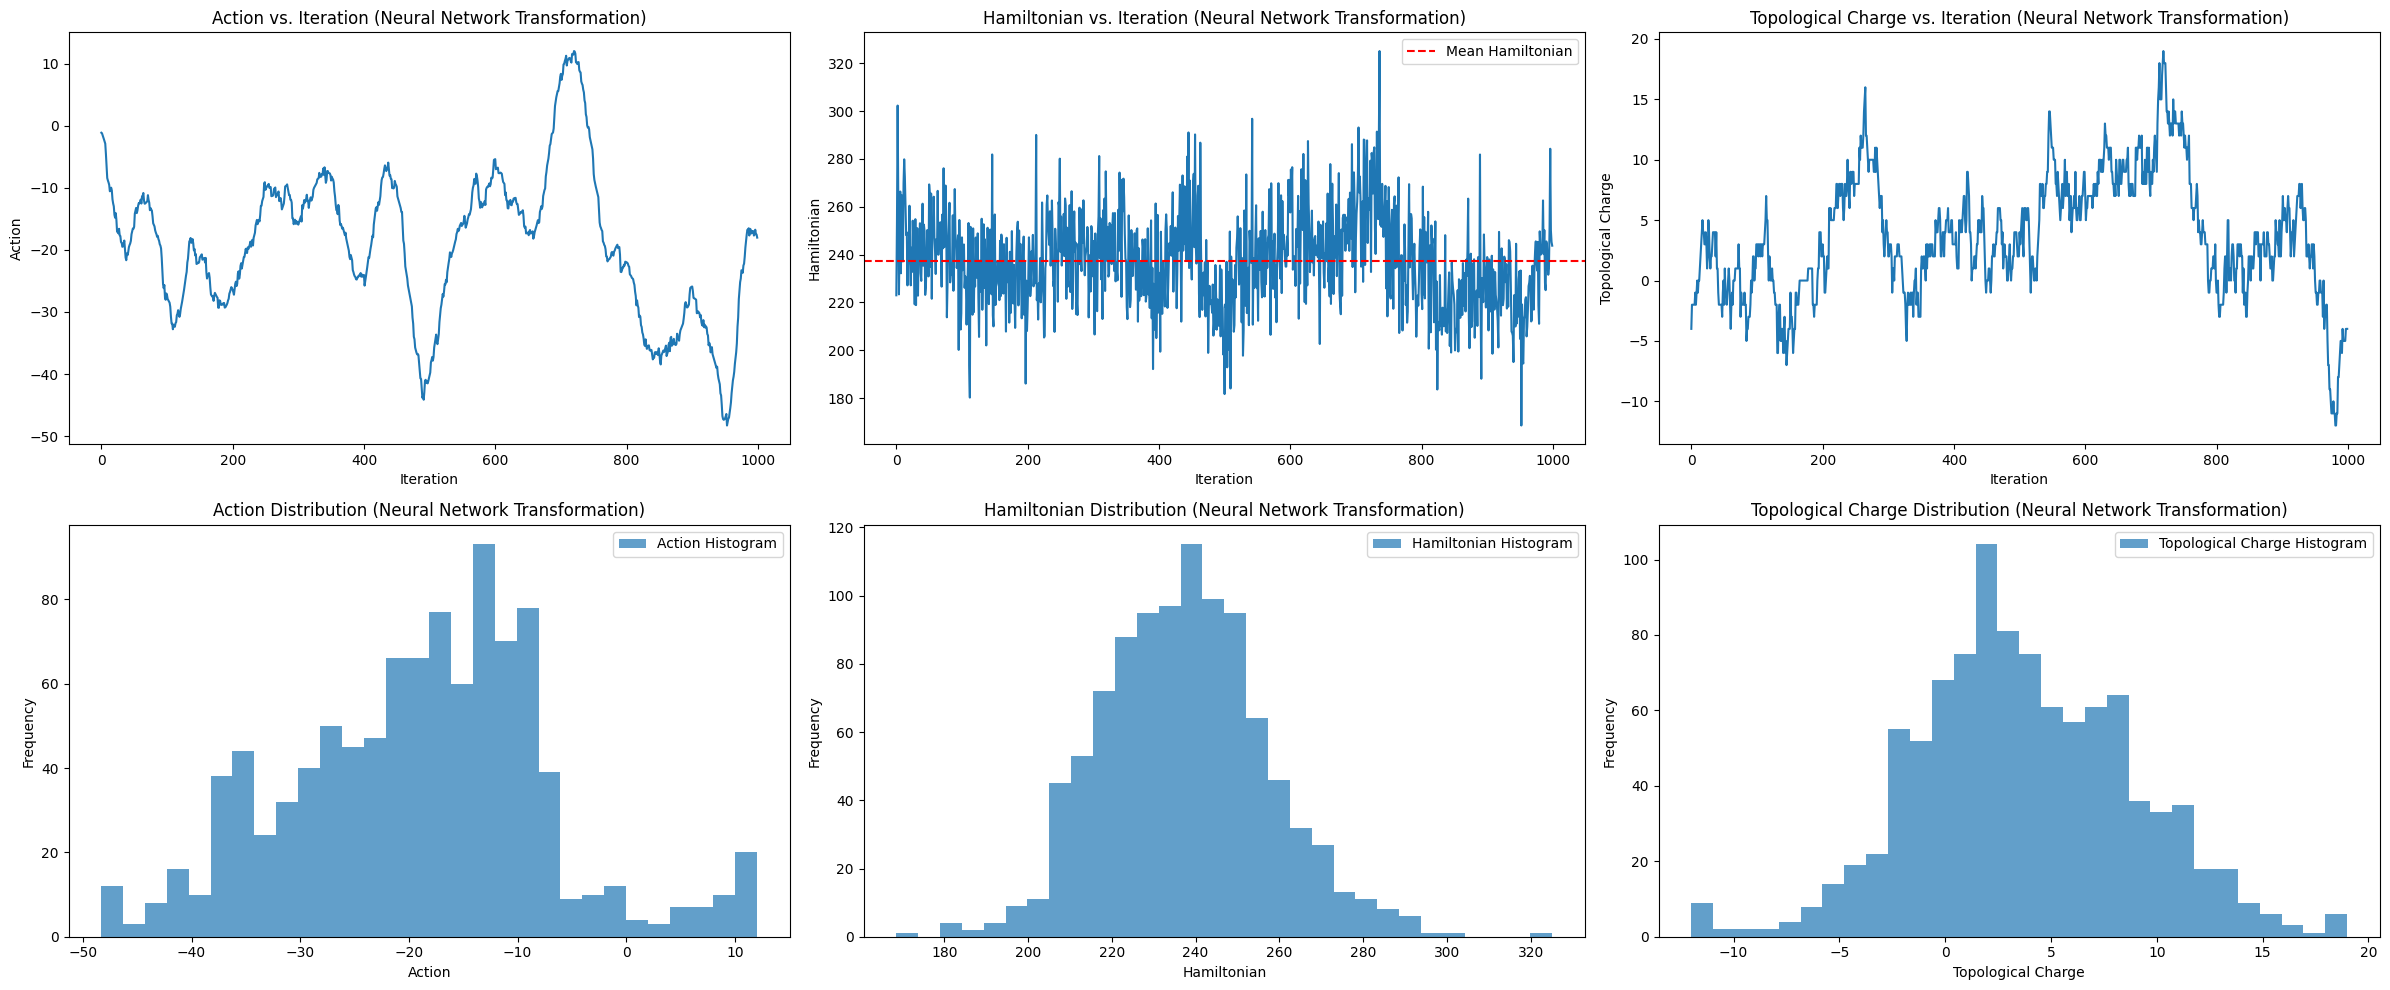

>>> Neural Network Field Transformation
Acceptance rate: 0.6070
Relative variation of Hamiltonian (delta H / H_mean): 0.6595
Variation of topological charge (delta Q): 31.0000


In [5]:
# Run HMC with neural network transformation
nn_transformation = NNFieldTransformation(lattice_size)
nn_transformation.train(hmc, n_iterations=1000)
final_config_nn, actions_nn, acceptance_rate_nn, topological_charges_nn, hamiltonians_nn = hmc.run(n_iterations, field_transformation=nn_transformation)
plot_results(actions_nn, topological_charges_nn, hamiltonians_nn, title_suffix="(Neural Network Transformation)")

print(">>> Neural Network Field Transformation")    

# Print the acceptance rate
print(f"Acceptance rate: {acceptance_rate_nn:.4f}")

# Calculate and print the variation of Hamiltonian (delta H) relative to mean H
delta_H_nn = np.max(hamiltonians_nn) - np.min(hamiltonians_nn)
H_mean_nn = np.mean(hamiltonians_nn)
relative_delta_H_nn = delta_H_nn / H_mean_nn
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H_nn:.4f}")

# Calculate and print the variation of topological charge (delta Q)
delta_Q_nn = np.max(topological_charges_nn) - np.min(topological_charges_nn)
print(f"Variation of topological charge (delta Q): {delta_Q_nn:.4f}")